Load libraries

In [17]:
#imports
from __future__ import print_function
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import h5py
from time import time
import os
from netCDF4 import num2date, date2num


Load odimh5 file

In [33]:
fn  = 'data/04_20131017_050036.h5'
#Since the names in the HDF5 file are non-standard we use file_field_names = True
radar = pyart.aux_io.read_odim_h5(fn, file_field_names=True) 

radar.fields['DBZH']['standard_name'] = 'Reflectivity'
radar.fields['DBZH']['units'] = 'dBZ'
radar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
radar.fields['VRADH']['standard_name'] = 'Velocity'
radar.fields['VRADH']['units'] = 'm/s'
radar.fields['VRADH']['long_name'] = 'Radial Velocity of Scatterers'

In [34]:
tilt = 0
lat_lines = np.arange(-33,-36,-.1)
lon_lines = np.arange(149, 153, .1)
# ogr2ogr -f "ESRI Shapefile" <output>.shp <input>.shp -clipsrc -36 -33 149 153
max_lat   = -33.2134
min_lat   = -34.0646
min_lon   = 150.0719
max_lon   = 151.2443
extent = [min_lat, max_lat, min_lon, max_lon]


In [35]:
hfile = h5py.File(fn, 'r')
d1_how = hfile['dataset1']['how'].attrs
NI = d1_how['NI']

gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_masked('DBZH')
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='VRADH', gatefilter = gatefilter, nyquist_vel=NI)
radar.add_field('VRADH_corr', corr_vel, False)

In [36]:
#pyart.io.write_cfradial('converted_kurnell_file.nc', radar)

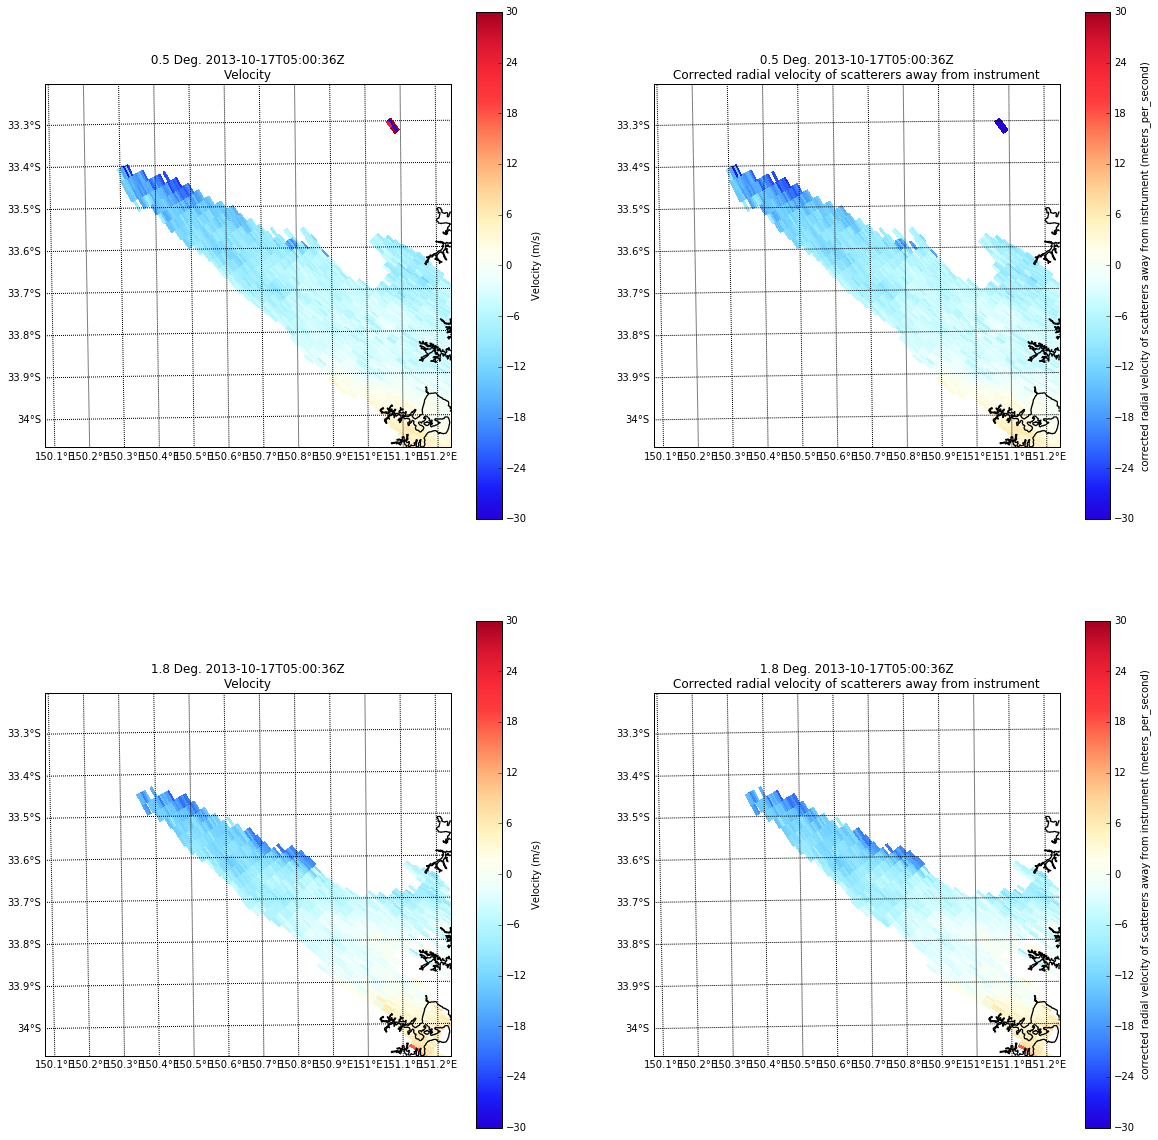

In [37]:
tilt = 1
my_display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
tilt = 0
my_display.plot_ppi_map('VRADH', tilt, vmin=-30, vmax=30, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat =min_lat, min_lon = min_lon, max_lon = max_lon,
                        cmap = pyart.graph.cm.BuDRd18,resolution='f')


ax = plt.gca()
plt.subplot(2,2,2)
tilt = 0
my_display.plot_ppi_map('VRADH_corr', tilt, vmin=-30., vmax=30., 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat =min_lat, min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.BuDRd18,resolution='f')

ax = plt.gca()
plt.subplot(2,2,3)
tilt = 1
my_display.plot_ppi_map('VRADH', tilt, vmin=-30, vmax=30, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat =min_lat, min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.BuDRd18,resolution='f')

ax = plt.gca()
plt.subplot(2,2,4)
tilt = 1
my_display.plot_ppi_map('VRADH_corr', tilt, vmin=-30., vmax=30., 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat =min_lat, min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.BuDRd18,resolution='f')

ax = plt.gca()